In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [41]:
file_paths = [ 
    'TNEA-2017-Cutoffs.xlsx',
    'TNEA-2018-Cutoffs.xlsx',
    'TNEA-2019-Cutoffs.xlsx',
    'TNEA-2020-Cutoffs.xlsx',
    'TNEA-2021-Cutoffs.xlsx',
    'TNEA-2022-Cutoffs.xlsx',
]

combined_df = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_excel(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

print("Combined Dataset:")
print(combined_df.head())

combined_df.to_csv('combined_cutoff.csv', index=False)

Combined Dataset:
   College Code                                       College Name  \
0             1  University Departments of Anna University, Che...   
1             1  University Departments of Anna University, Che...   
2             1  University Departments of Anna University, Che...   
3             1  University Departments of Anna University, Che...   
4             1  University Departments of Anna University, Che...   

  Branch Code                                Branch Name      OC          BC  \
0          BY               BIO MEDICAL ENGINEERING (SS)  195.00  194.000000   
1          CE                          CIVIL ENGINEERING  193.50  192.685000   
2          CM      COMPUTER SCIENCE AND ENGINEERING (SS)  198.00  197.666667   
3          CS           COMPUTER SCIENCE AND ENGINEERING  199.00  198.120000   
4          EC  ELECTRONICS AND COMMUNICATION ENGINEERING  197.99  197.333333   

       BCM      MBC   MBCDNC    MBCV      SC      SCA       ST  
0  193.500  194

In [42]:
file_paths = [    
    'TNEA-2021-Ranks.xlsx',
    'TNEA-2022-Ranks.xlsx',    
]

combined_df = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_excel(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

print("Combined Dataset:")
print(combined_df.head())

combined_df.to_csv('combined_rank.csv', index=False)

Combined Dataset:
   College Code                                       College Name  \
0             1  University Departments of Anna University, Che...   
1             1  University Departments of Anna University, Che...   
2             1  University Departments of Anna University, Che...   
3             1  University Departments of Anna University, Che...   
4             1  University Departments of Anna University, Che...   

  Branch Code                                Branch Name    OC      BC  \
0          BY               BIO MEDICAL ENGINEERING (SS)  1248  1998.0   
1          CE                          CIVIL ENGINEERING  2326  3227.0   
2          CM      COMPUTER SCIENCE AND ENGINEERING (SS)   175   260.0   
3          CS           COMPUTER SCIENCE AND ENGINEERING    29   111.0   
4          EC  ELECTRONICS AND COMMUNICATION ENGINEERING   218   332.0   

      BCM     MBC  MBCDNC    MBCV      SC      SCA       ST  
0  2390.0  1420.0  7177.0  3397.0  8937.0  22463.0  26

In [43]:
cutoff_data = pd.read_csv('combined_cutoff.csv')

cutoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   College Code  5320 non-null   int64  
 1   College Name  5320 non-null   object 
 2   Branch Code   5320 non-null   object 
 3   Branch Name   5320 non-null   object 
 4   OC            5320 non-null   float64
 5   BC            3709 non-null   float64
 6   BCM           2686 non-null   float64
 7   MBC           3184 non-null   float64
 8   MBCDNC        1530 non-null   float64
 9   MBCV          1475 non-null   float64
 10  SC            3385 non-null   float64
 11  SCA           1605 non-null   float64
 12  ST            501 non-null    float64
dtypes: float64(9), int64(1), object(3)
memory usage: 540.4+ KB


In [44]:
cutoff_data.describe()


,College Code,OC,BC,BCM,MBC,MBCDNC,MBCV,SC,SCA,ST
count,5320.000000,5320.000000,3709.000000,2686.000000,3184.000000,1530.000000,1475.000000,3385.000000,1605.000000,501.000000
mean,2863.070865,140.817044,138.626586,148.387916,139.098295,158.194693,155.562462,125.083697,135.072406,139.689947
std,1463.780891,34.115700,35.937062,29.752473,36.059738,21.099592,23.686523,31.561250,30.177420,28.871742
min,1.000000,77.860000,78.000000,77.500000,78.000000,80.000000,78.000000,77.500000,80.000000,80.000000
25%,1436.750000,113.000000,105.000000,129.000000,103.000000,145.003750,141.242500,95.000000,108.500000,117.000000
50%,2702.000000,146.000000,142.430000,153.995000,146.500000,161.060000,159.095000,125.135000,139.000000,143.650000
75%,3825.000000,169.071250,170.350000,171.500000,170.000000,173.407500,174.032500,150.600000,159.275000,162.405000
max,5990.000000,200.000000,200.000000,199.000000,199.333333,198.000000,198.000000,197.500000,197.500000,193.725000


In [45]:
missing_values = cutoff_data.isnull().sum()
missing_values

College Code       0
College Name       0
Branch Code        0
Branch Name        0
OC                 0
BC              1611
BCM             2634
MBC             2136
MBCDNC          3790
MBCV            3845
SC              1935
SCA             3715
ST              4819
dtype: int64

In [46]:
mean_value = cutoff_data['OC'].mean()
cutoff_data['OC'].fillna(mean_value, inplace=True)
mean_value = cutoff_data['BC'].mean()
cutoff_data['BC'].fillna(mean_value, inplace=True)
mean_value = cutoff_data['BCM'].mean()
cutoff_data['BCM'].fillna(mean_value, inplace=True)
mean_value = cutoff_data['MBC'].mean()
cutoff_data['MBC'].fillna(mean_value, inplace=True)
mean_value = cutoff_data['MBCDNC'].mean()
cutoff_data['MBCDNC'].fillna(mean_value, inplace=True)
mean_value = cutoff_data['MBCV'].mean()
cutoff_data['MBCV'].fillna(mean_value, inplace=True)
mean_value = cutoff_data['SC'].mean()
cutoff_data['SC'].fillna(mean_value, inplace=True)
mean_value = cutoff_data['SCA'].mean()
cutoff_data['SCA'].fillna(mean_value, inplace=True)
mean_value = cutoff_data['ST'].mean()
cutoff_data['ST'].fillna(mean_value, inplace=True)

In [47]:
missing_values = cutoff_data.isnull().sum()
missing_values

College Code    0
College Name    0
Branch Code     0
Branch Name     0
OC              0
BC              0
BCM             0
MBC             0
MBCDNC          0
MBCV            0
SC              0
SCA             0
ST              0
dtype: int64

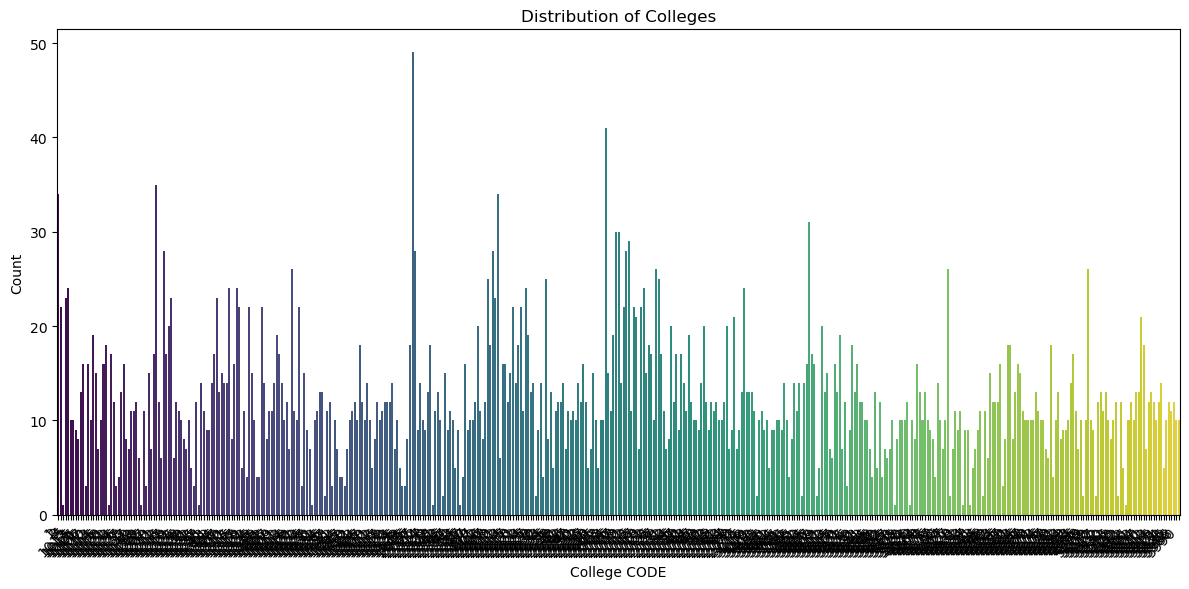

In [48]:
college_counts = cutoff_data['College Code'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=college_counts.index, y=college_counts.values, palette="viridis")
plt.title('Distribution of Colleges')
plt.xlabel('College CODE')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
rank_data = pd.read_csv('combined_rank.csv')

rank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   College Code  5320 non-null   int64  
 1   College Name  5320 non-null   object 
 2   Branch Code   5320 non-null   object 
 3   Branch Name   5320 non-null   object 
 4   OC            5320 non-null   int64  
 5   BC            3709 non-null   float64
 6   BCM           2686 non-null   float64
 7   MBC           3184 non-null   float64
 8   MBCDNC        1530 non-null   float64
 9   MBCV          1475 non-null   float64
 10  SC            3385 non-null   float64
 11  SCA           1605 non-null   float64
 12  ST            501 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 540.4+ KB


In [51]:
rank_data.describe()

,College Code,OC,BC,BCM,MBC,MBCDNC,MBCV,SC,SCA,ST
count,5320.000000,5320.000000,3709.000000,2686.000000,3184.000000,1530.000000,1475.000000,3385.000000,1605.000000,501.000000
mean,2863.070865,88700.593421,90770.170127,79105.441176,88700.557475,79649.813072,82567.300339,112970.215657,100741.203115,94057.736527
std,1463.780891,46703.376037,49294.546271,43417.956824,48136.678970,40030.323022,41831.363767,37804.038534,38247.925669,39927.154515
min,1.000000,22.000000,0.000000,0.000000,0.000000,196.000000,172.000000,0.000000,0.000000,0.000000
25%,1436.750000,48070.500000,45861.000000,42773.750000,47379.500000,46905.000000,44992.500000,94623.000000,75376.000000,63293.000000
50%,2702.000000,93439.000000,98780.000000,80383.000000,93046.500000,83039.000000,88324.000000,126358.000000,108726.000000,103471.000000
75%,3825.000000,131276.250000,134615.000000,117666.500000,133614.250000,117303.000000,121956.500000,138806.000000,131578.000000,127095.000000
max,5990.000000,156270.000000,156268.000000,156271.000000,156264.000000,136928.000000,136965.000000,156263.000000,156152.000000,156118.000000


In [52]:
missing_values = rank_data.isnull().sum()
missing_values

College Code       0
College Name       0
Branch Code        0
Branch Name        0
OC                 0
BC              1611
BCM             2634
MBC             2136
MBCDNC          3790
MBCV            3845
SC              1935
SCA             3715
ST              4819
dtype: int64

In [53]:
mean_value = rank_data['OC'].mean()
rank_data['OC'].fillna(mean_value, inplace=True)
mean_value = rank_data['BC'].mean()
rank_data['BC'].fillna(mean_value, inplace=True)
mean_value = rank_data['BCM'].mean()
rank_data['BCM'].fillna(mean_value, inplace=True)
mean_value = rank_data['MBC'].mean()
rank_data['MBC'].fillna(mean_value, inplace=True)
mean_value = rank_data['MBCDNC'].mean()
rank_data['MBCDNC'].fillna(mean_value, inplace=True)
mean_value = rank_data['MBCV'].mean()
rank_data['MBCV'].fillna(mean_value, inplace=True)
mean_value = rank_data['SC'].mean()
rank_data['SC'].fillna(mean_value, inplace=True)
mean_value = rank_data['SCA'].mean()
rank_data['SCA'].fillna(mean_value, inplace=True)
mean_value = rank_data['ST'].mean()
rank_data['ST'].fillna(mean_value, inplace=True)

In [54]:
missing_values = cutoff_data.isnull().sum()
missing_values

College Code    0
College Name    0
Branch Code     0
Branch Name     0
OC              0
BC              0
BCM             0
MBC             0
MBCDNC          0
MBCV            0
SC              0
SCA             0
ST              0
dtype: int64

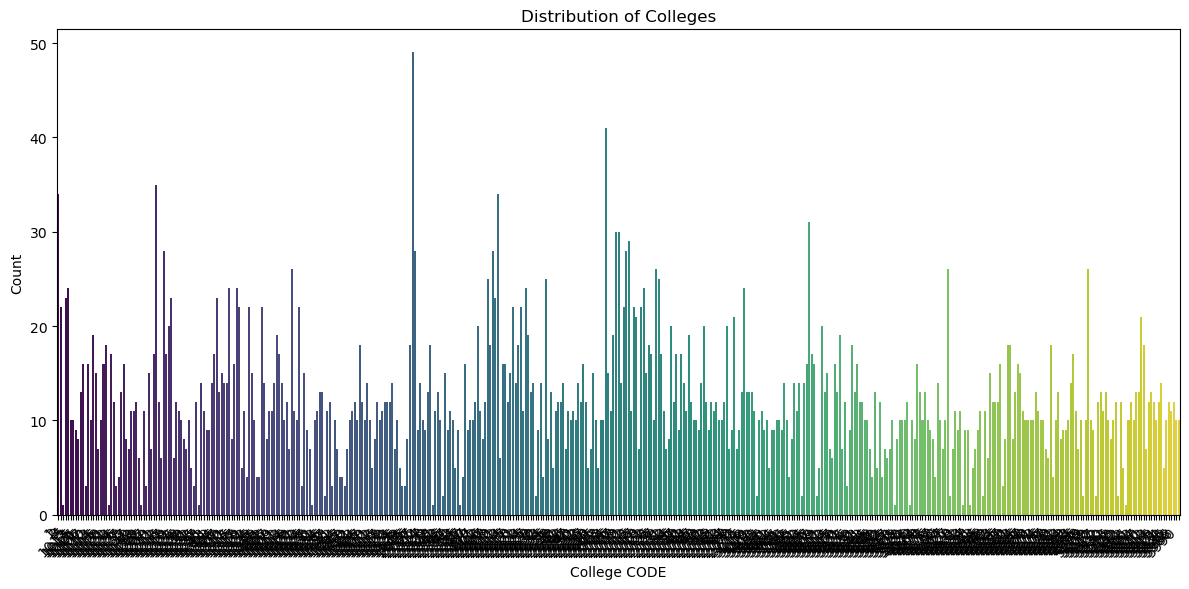

In [55]:
college_counts = cutoff_data['College Code'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=college_counts.index, y=college_counts.values, palette="viridis")
plt.title('Distribution of Colleges')
plt.xlabel('College CODE')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
rank_data = rank_data.rename(columns={'BC': "BC_R"})
rank_data = rank_data.rename(columns={'OC': "OC_R"})
rank_data = rank_data.rename(columns={'BCM': "BCM_R"})
rank_data = rank_data.rename(columns={'MBC': "MBC_R"})
rank_data = rank_data.rename(columns={'MBCDNC': "MBCDNC_R"})
rank_data = rank_data.rename(columns={'MBCV': "MBCV_R"})
rank_data = rank_data.rename(columns={'SC': "SC_R"})
rank_data = rank_data.rename(columns={'SCA': "SCA_R"})
rank_data = rank_data.rename(columns={'ST': "ST_R"})

In [57]:
rank_data.head()

,College Code,College Name,Branch Code,Branch Name,OC_R,BC_R,BCM_R,MBC_R,MBCDNC_R,MBCV_R,SC_R,SCA_R,ST_R
0,1,"University Departments of Anna University, Che...",BY,BIO MEDICAL ENGINEERING (SS),1248,1998.0,2390.0,1420.0,7177.0,3397.0,8937.0,22463.0,26147.0
1,1,"University Departments of Anna University, Che...",CE,CIVIL ENGINEERING,2326,3227.0,6363.0,2527.0,6612.0,5193.0,7316.0,23541.0,43295.0
2,1,"University Departments of Anna University, Che...",CM,COMPUTER SCIENCE AND ENGINEERING (SS),175,260.0,631.0,312.0,501.0,771.0,2940.0,3853.0,5838.0
3,1,"University Departments of Anna University, Che...",CS,COMPUTER SCIENCE AND ENGINEERING,29,111.0,388.0,67.0,196.0,172.0,551.0,2101.0,3779.0
4,1,"University Departments of Anna University, Che...",EC,ELECTRONICS AND COMMUNICATION ENGINEERING,218,332.0,789.0,368.0,962.0,870.0,1680.0,4067.0,3514.0


In [58]:
df1 = cutoff_data
df2 = rank_data

In [59]:
merged_df = pd.concat([df1, df2[['OC_R', 'BC_R', 'BCM_R', 'MBC_R', 'MBCDNC_R', 'MBCV_R', 'SC_R', 'SCA_R', 'ST_R']]], axis=1)

merged_df.head()

,College Code,College Name,Branch Code,Branch Name,OC,BC,BCM,MBC,MBCDNC,MBCV,...,ST,OC_R,BC_R,BCM_R,MBC_R,MBCDNC_R,MBCV_R,SC_R,SCA_R,ST_R
0,1,"University Departments of Anna University, Che...",BY,BIO MEDICAL ENGINEERING (SS),195.00,194.000000,193.500,194.775,190.000,192.50,...,181.000,1248,1998.0,2390.0,1420.0,7177.0,3397.0,8937.0,22463.0,26147.0
1,1,"University Departments of Anna University, Che...",CE,CIVIL ENGINEERING,193.50,192.685000,190.500,193.330,190.275,191.24,...,174.635,2326,3227.0,6363.0,2527.0,6612.0,5193.0,7316.0,23541.0,43295.0
2,1,"University Departments of Anna University, Che...",CM,COMPUTER SCIENCE AND ENGINEERING (SS),198.00,197.666667,196.375,197.500,196.760,196.00,...,190.815,175,260.0,631.0,312.0,501.0,771.0,2940.0,3853.0,5838.0
3,1,"University Departments of Anna University, Che...",CS,COMPUTER SCIENCE AND ENGINEERING,199.00,198.120000,197.020,198.625,198.000,198.00,...,192.165,29,111.0,388.0,67.0,196.0,172.0,551.0,2101.0,3779.0
4,1,"University Departments of Anna University, Che...",EC,ELECTRONICS AND COMMUNICATION ENGINEERING,197.99,197.333333,196.000,197.130,195.540,195.78,...,192.500,218,332.0,789.0,368.0,962.0,870.0,1680.0,4067.0,3514.0


In [60]:
missing_values = merged_df.isnull().sum()
missing_values

College Code    0
College Name    0
Branch Code     0
Branch Name     0
OC              0
BC              0
BCM             0
MBC             0
MBCDNC          0
MBCV            0
SC              0
SCA             0
ST              0
OC_R            0
BC_R            0
BCM_R           0
MBC_R           0
MBCDNC_R        0
MBCV_R          0
SC_R            0
SCA_R           0
ST_R            0
dtype: int64

In [34]:
mean_value = merged_df['OC_R'].mean()
merged_df['OC_R'].fillna(mean_value, inplace=True)
mean_value = merged_df['BC_R'].mean()
merged_df['BC_R'].fillna(mean_value, inplace=True)
mean_value = merged_df['BCM_R'].mean()
merged_df['BCM_R'].fillna(mean_value, inplace=True)
mean_value = merged_df['MBC_R'].mean()
merged_df['MBC_R'].fillna(mean_value, inplace=True)
mean_value = merged_df['MBCDNC_R'].mean()
merged_df['MBCDNC_R'].fillna(mean_value, inplace=True)
mean_value = merged_df['MBCV_R'].mean()
merged_df['MBCV_R'].fillna(mean_value, inplace=True)
mean_value = merged_df['SC_R'].mean()
merged_df['SC_R'].fillna(mean_value, inplace=True)
mean_value = merged_df['SCA_R'].mean()
merged_df['SCA_R'].fillna(mean_value, inplace=True)
mean_value = merged_df['ST_R'].mean()
merged_df['ST_R'].fillna(mean_value, inplace=True)

In [61]:
le = LabelEncoder()
merged_df['Branch Name'] = le.fit_transform(merged_df['Branch Name'])

In [69]:

X = merged_df.drop(['College Name', 'Branch Code','College Code','MBCDNC','MBCV','MBCDNC_R','MBCV_R'], axis=1)

y = merged_df['Branch Name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Branch Name  5320 non-null   int32  
 1   OC           5320 non-null   float64
 2   BC           5320 non-null   float64
 3   BCM          5320 non-null   float64
 4   MBC          5320 non-null   float64
 5   SC           5320 non-null   float64
 6   SCA          5320 non-null   float64
 7   ST           5320 non-null   float64
 8   OC_R         5320 non-null   int64  
 9   BC_R         5320 non-null   float64
 10  BCM_R        5320 non-null   float64
 11  MBC_R        5320 non-null   float64
 12  SC_R         5320 non-null   float64
 13  SCA_R        5320 non-null   float64
 14  ST_R         5320 non-null   float64
dtypes: float64(13), int32(1), int64(1)
memory usage: 602.8 KB


In [73]:
from sklearn.metrics import r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
Y_pred_lr = model_lr.predict(X_test)

r2_lr = r2_score(y_test, Y_pred_lr)
print("R-squared using Linear Regression: ", r2_lr * 100)

R-squared using Linear Regression:  100.0


In [72]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.layers import Dense, Dropout,Flatten



scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))
print("Training accuracy:", history.history['accuracy'][-1] *1000)
print("Training loss:", history.history['loss'][-1]*1000)

Epoch 1/10
133/133 [==============================] - 2s 7ms/step - loss: -1584.2823 - accuracy: 0.0023 - val_loss: -7081.4263 - val_accuracy: 9.3985e-04
Epoch 2/10
133/133 [==============================] - 1s 4ms/step - loss: -34348.5430 - accuracy: 0.0023 - val_loss: -81389.4609 - val_accuracy: 9.3985e-04
Epoch 3/10
133/133 [==============================] - 1s 4ms/step - loss: -178829.9375 - accuracy: 0.0023 - val_loss: -311989.0625 - val_accuracy: 9.3985e-04
Epoch 4/10
133/133 [==============================] - 1s 4ms/step - loss: -516623.8750 - accuracy: 0.0023 - val_loss: -774383.3750 - val_accuracy: 9.3985e-04
Epoch 5/10
133/133 [==============================] - 1s 4ms/step - loss: -1114851.1250 - accuracy: 0.0023 - val_loss: -1533074.5000 - val_accuracy: 9.3985e-04
Epoch 6/10
133/133 [==============================] - 0s 4ms/step - loss: -2035885.7500 - accuracy: 0.0023 - val_loss: -2637990.2500 - val_accuracy: 9.3985e-04
Epoch 7/10
133/133 [==============================] - 

In [98]:
X_columns = ['College Code', 'OC']
y_column = 'OC_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code       OC
2629          1014  167.500
511           1401  169.065
62            1015  172.820
3128          1409  135.500
4233          2740  152.500
...            ...      ...
3092          1399  192.000
3772          2628   92.000
5191          5851   95.000
5226          5907   95.500
860           2328  166.090

[4256 rows x 2 columns]


In [99]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 87.06473851025038


In [100]:
with open('MODEL_OC.pkl', 'wb') as file:
    pickle.dump(model_1, file)

In [101]:
data = np.array([[40,167]])
y_pred = model_1.predict(data)
print(y_pred)

[51364.3620183]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
X_columns = ['College Code', 'BC']
y_column = 'BC_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code          BC
2629          1014  150.500000
511           1401  163.000000
62            1015  167.500000
3128          1409  121.000000
4233          2740  147.000000
...            ...         ...
3092          1399  190.000000
3772          2628   87.000000
5191          5851  138.626586
5226          5907  138.626586
860           2328  146.625000

[4256 rows x 2 columns]


In [103]:
model_BC = LinearRegression()
model_BC.fit(X_train, y_train)

y_pred = model_BC.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 88.50420762130973


In [104]:
with open('model_BC.pkl', 'wb') as file:
    pickle.dump(model_BC, file)

In [105]:
X_columns = ['College Code', 'BCM']
y_column = 'BCM_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code         BCM
2629          1014  134.500000
511           1401  148.387916
62            1015  168.475000
3128          1409  148.387916
4233          2740  144.000000
...            ...         ...
3092          1399  191.000000
3772          2628  148.387916
5191          5851  148.387916
5226          5907   83.500000
860           2328  147.525000

[4256 rows x 2 columns]


In [106]:
model_BCM = LinearRegression()
model_BCM.fit(X_train, y_train)

y_pred = model_BCM.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 84.99997368317642


In [107]:
with open('model_BCM.pkl', 'wb') as file:
    pickle.dump(model_BCM, file)

In [108]:
X_columns = ['College Code', 'MBC']
y_column = 'MBC_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code         MBC
2629          1014  155.000000
511           1401  156.710000
62            1015  168.500000
3128          1409  121.500000
4233          2740  134.000000
...            ...         ...
3092          1399  187.500000
3772          2628   88.000000
5191          5851  139.098295
5226          5907  139.098295
860           2328  152.135000

[4256 rows x 2 columns]


In [109]:
model_MBC = LinearRegression()
model_MBC.fit(X_train, y_train)

y_pred = model_MBC.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 90.99838904898026


In [110]:
with open('model_MBC.pkl', 'wb') as file:
    pickle.dump(model_MBC, file)

In [111]:
X_columns = ['College Code', 'MBCDNC']
y_column = 'MBCDNC_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code      MBCDNC
2629          1014  158.194693
511           1401  158.194693
62            1015  162.330000
3128          1409  158.194693
4233          2740  158.194693
...            ...         ...
3092          1399  158.194693
3772          2628  158.194693
5191          5851  158.194693
5226          5907  158.194693
860           2328  143.695000

[4256 rows x 2 columns]


In [112]:
model_MBCDNC = LinearRegression()
model_MBCDNC.fit(X_train, y_train)

y_pred = model_MBCDNC.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 86.97773282557219


In [113]:
with open('model_MBCDNC.pkl', 'wb') as file:
    pickle.dump(model_MBCDNC, file)

In [114]:
X_columns = ['College Code', 'MBCV']
y_column = 'MBCV_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code        MBCV
2629          1014  155.562462
511           1401  167.470000
62            1015  165.500000
3128          1409  155.562462
4233          2740  155.562462
...            ...         ...
3092          1399  155.562462
3772          2628  155.562462
5191          5851  155.562462
5226          5907  155.562462
860           2328  144.900000

[4256 rows x 2 columns]


In [115]:
model_MBCV = LinearRegression()
model_MBCV.fit(X_train, y_train)

y_pred = model_MBCV.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 86.17688085501301


In [45]:
with open('model_MBCV.pkl', 'wb') as file:
    pickle.dump(model_MBCV, file)

In [116]:
X_columns = ['College Code', 'SC']
y_column = 'SC_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code          SC
2629          1014  145.000000
511           1401  146.970000
62            1015  159.470000
3128          1409  103.500000
4233          2740   84.000000
...            ...         ...
3092          1399  177.350000
3772          2628   80.000000
5191          5851  125.083697
5226          5907   91.000000
860           2328  143.990000

[4256 rows x 2 columns]


In [117]:
model_SC = LinearRegression()
model_SC.fit(X_train, y_train)

y_pred = model_SC.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 80.92813370141003


In [48]:
with open('model_SC.pkl', 'wb') as file:
    pickle.dump(model_SC, file)

In [118]:
X_columns = ['College Code', 'SCA']
y_column = 'SCA_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code         SCA
2629          1014  132.500000
511           1401  135.072406
62            1015  135.072406
3128          1409  135.072406
4233          2740  135.072406
...            ...         ...
3092          1399  147.000000
3772          2628  135.072406
5191          5851  135.072406
5226          5907  135.072406
860           2328  165.750000

[4256 rows x 2 columns]


In [119]:
model_SCA = LinearRegression()
model_SCA.fit(X_train, y_train)

y_pred = model_SCA.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 82.47684042186721


In [120]:
with open('model_SCA.pkl', 'wb') as file:
    pickle.dump(model_SCA, file)

In [122]:
X_columns = ['College Code', 'ST']
y_column = 'ST_R'  

X = merged_df[X_columns]
y = merged_df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      College Code          ST
2629          1014  139.689947
511           1401  139.689947
62            1015  139.689947
3128          1409  139.689947
4233          2740  139.689947
...            ...         ...
3092          1399  118.500000
3772          2628  139.689947
5191          5851  139.689947
5226          5907  139.689947
860           2328  139.689947

[4256 rows x 2 columns]


In [123]:
model_ST = LinearRegression()
model_ST.fit(X_train, y_train)

y_pred = model_ST.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 81.56297998412812


In [124]:
with open('model_ST.pkl', 'wb') as file:
    pickle.dump(model_ST, file)